# Khujta AI Business iypnb

## Prop√≥sito
Este notebook est√° dise√±ado para analizar datos transaccionales. Su objetivo es descubrir ideas accionables que optimicen las operaciones, el inventario y la generaci√≥n de ingresos.

## Estructura
1. **Carga y Configuraci√≥n de Datos**:
   - Importar bibliotecas y configurar variables.
   - Cargar el conjunto de datos y realizar verificaciones iniciales de integridad de datos.
2. **An√°lisis**:
   - Agregar datos para identificar los productos de mejor desempe√±o.
   - Aplicar el Principio de Pareto (regla 80/20) para resaltar los principales generadores de ingresos.
   - Visualizar la distribuci√≥n de ingresos y m√©tricas acumulativas.
   - Identificar inventario muerto y evaluar la salud del inventario.
   - Analizar patrones de ventas por d√≠a y hora.
3. **Resumen Ejecutivo**:
   - Consolidar las ideas clave en un tablero para los tomadores de decisiones.

## Valor
- **Optimizaci√≥n de Ingresos**: Enfocarse en los productos principales que generan la mayor√≠a de los ingresos.
- **Reducci√≥n de Costos**: Destacar inventario muerto e ineficiencias para liberar efectivo y espacio de almacenamiento.
- **Eficiencia Operativa**: Optimizar horarios de personal y operaciones basados en patrones de ventas.
- **Decisiones Basadas en Datos**: Proporcionar ideas accionables para la planificaci√≥n estrat√©gica.

Este cuaderno transforma datos crudos en ideas significativas, permitiendo una toma de decisiones informada y mejoras comerciales medibles.

# 1. Inicializaci√≥n

Esta secci√≥n se centra en cargar y preparar los datos para el an√°lisis. Mapearemos las columnas, cargaremos el conjunto de datos y realizaremos verificaciones iniciales para garantizar que los datos est√©n listos para una exploraci√≥n m√°s profunda.

## 1.1. Configurar Variables

Mapear las columnas asegura que el script pueda interpretar correctamente el conjunto de datos. Ajuste los nombres de las columnas seg√∫n sea necesario para que coincidan con la estructura del conjunto de datos.

### 1.1.0. Configuraci√≥n del Cuaderno
Antes de profundizar en el an√°lisis, definimos variables y funciones clave. Esto asegura consistencia y claridad en todo el cuaderno.

<b>Generalmente no tocar, los ajustes de depuraci√≥n se realizan aqu√≠.</b>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from datetime import datetime, timedelta
pd.set_option('display.float_format', '{:.0f}'.format)

# Function to print debug information for a DataFrame
def debug_dataframe(df, dbg_flag = True, limit = 5):
    if dbg_flag:
        print(tabulate(df.head(limit), headers='keys', tablefmt='psql'))
        # print(df.head(limit).to_string())

# debug flags
dbg_setup = 0 # Changed to 1 to show setup info
dbg_load = 0 # Changed to 1 to show more info during load
dbg_analysis = 0 # Changed to 1 to show more info for analysis steps

### 1.1.1. MANUAL Cargar Variables

In [ ]:
## Manually set paths and filenames
data_path = 'data/'
project = 'buenacarne/'
file_in_name = 'sample_completeDet'

In [ ]:
today_str = datetime.today().strftime('%Y%m%d')
file_in = data_path + project + file_in_name
file_out = data_path + project + file_in_name + '_out_' + today_str

if dbg_setup:
    print(f"Input file names: {file_in}")
    print(f"Output file names: {file_out}")

### 1.1.2 MANUAL Variables de An√°lisis
Definir las variables y mapear las columnas asegura que el an√°lisis est√© adaptado al conjunto de datos. Ajuste estas configuraciones seg√∫n sea necesario para que coincidan con sus datos.

In [ ]:
# Manually set Analysis parameters
# present_dt = pd.Timestamp.now() # Default Analysis date
present_dt = datetime(2018, 1, 21) # Change in case you want to analyze a specific date
top_prcnt = 0.2 # % of top products to consider as "top sellers"

# Columns mapping
transaction_id = 'trans_id' # unique transaction identifier
date_col = 'fecha' # Adjust based on actual column name
product_col = 'producto' # product identifier
description_col = 'glosa' # product description
cost_col = 'costo' # cost per item
revenue_col = 'total' # total revenue on a given item in a transaction
quantity_col = 'cantidad'# quantity sold of that item in a transaction
current_stock_col = np.nan # Placeholder for current stock column if available

In [ ]:
# Column groups
# List of amount columns to format
amount_cols = [revenue_col, 'revenue_cum']
# List of percentage columns to format
percentage_cols = ['revenue_pct_cum','quantity_pct_cum']

## 1.2. Cargar Datos

Aqu√≠, cargamos el conjunto de datos y configuramos las bibliotecas necesarias para la manipulaci√≥n y visualizaci√≥n de datos. Este paso es crucial para garantizar que los datos sean accesibles y est√©n correctamente formateados para el an√°lisis.

In [ ]:
# Cargar datos
df = pd.read_csv(file_in + '.csv')
if dbg_load:
    debug_dataframe(df, dbg_load)

## 1.3. Verificar Integridad de los Datos

Este paso implica verificar valores faltantes y comprender la estructura del conjunto de datos. Identificar valores nulos temprano ayuda a limpiar los datos y garantizar un an√°lisis preciso.

In [ ]:
# Set up nice visuals
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Quick data reconnaissance
if dbg_load: 
    print("Data shape:", df.shape)
    print(f"Columns({df.columns.size}):", df.columns.tolist())


In [ ]:
# Check data types and missing values
if dbg_load > 1: 
    print("Data Info:")
    df.info()

In [ ]:
if dbg_load: print("\nMissing values:")
if dbg_load: df.isnull().sum()

# Get date range
if date_col in df.columns:
    df[date_col] = pd.to_datetime(df[date_col])
if dbg_load: print(f"Data range: {df[date_col].min()} to {df[date_col].max()}")

# 2. An√°lisis

Esta secci√≥n profundiza en el an√°lisis principal, descubriendo ideas sobre el desempe√±o de productos, la distribuci√≥n de ingresos y la eficiencia operativa. Cada subsecci√≥n se basa en los datos para proporcionar recomendaciones accionables.

## 2.1. Configurar Funciones de Formato
Las funciones de formato se utilizan para mejorar la legibilidad de los resultados. Por ejemplo, los valores monetarios se muestran en notaci√≥n de peso chileno y los porcentajes se formatean para mayor claridad.

In [ ]:
# Define a function to format numbers in Chilean peso notation
def format_chilean_peso(value: float) -> str:
    if isinstance(value, (int, float)):
        return f"$  {value:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")
    return value

# Define a function to format numbers as percentages
def format_percentage(value: float) -> str:
    if isinstance(value, (int, float)):
        return f"{value:.2f} %"
    return value

def get_format_analysis(df: pd.DataFrame, amount_cols: list = amount_cols, percentage_cols: list = percentage_cols) -> pd.DataFrame :
    df_copy = df.copy()
    # Apply the formatting function to percentage columns
    for col in percentage_cols:
        df_copy[col] = df_copy[col].apply(format_percentage)

    # Apply the formatting function to amount columns
    for col in amount_cols:
        df_copy[col] = df_copy[col].apply(format_chilean_peso)
        
    # Display the formatted dataset
    return df_copy

## 2.2. N√∫meros B√°sicos

Esta secci√≥n proporciona m√©tricas fundamentales, como ingresos totales y desempe√±o de productos. Estas m√©tricas sirven como base para un an√°lisis m√°s profundo.

### 2.2.1. Agregaciones B√°sicas

Agrupar los datos por producto revela qu√© art√≠culos contribuyen m√°s a los ingresos y al volumen de ventas. Este paso es esencial para identificar productos clave.

In [ ]:
# Which products REALLY matter?
product_analysis = df.groupby(product_col).agg({
    description_col: 'first',  # Include the product description
    revenue_col: 'sum',
    quantity_col: 'sum',
    transaction_id: 'count',  # or whatever identifies unique sales
}).sort_values(revenue_col, ascending=False)

if dbg_analysis: debug_dataframe(product_analysis) # product_analysis

### 2.2.2. M√©tricas Acumulativas

Las m√©tricas acumulativas, como ingresos y cantidad, ayudan a visualizar la distribuci√≥n de las ventas. Este an√°lisis destaca los productos m√°s impactantes.

In [ ]:
# Basic stats
product_analysis['revenue_cum'] = product_analysis[revenue_col].cumsum() # cumulative revenue
product_analysis['revenue_pct_cum'] = 100 * product_analysis['revenue_cum'] / product_analysis[revenue_col].sum() # cumulative revenue %
product_analysis['quantity_cum'] = product_analysis[quantity_col].cumsum() # cumulative quantity
product_analysis['quantity_pct_cum'] = 100 * product_analysis['quantity_cum'] / product_analysis[quantity_col].sum() # cumulative quantity %

if dbg_analysis: debug_dataframe(get_format_analysis(product_analysis, amount_cols=amount_cols, percentage_cols=percentage_cols))

## 2.3. An√°lisis 80/20

El Principio de Pareto (regla 80/20) se aplica para identificar los productos de mejor desempe√±o. Este an√°lisis se centra en el peque√±o subconjunto de productos que generan la mayor√≠a de los ingresos.

### 2.3.1. Idea Principal

Este paso identifica los productos principales que contribuyen de manera desproporcionada a los ingresos. Estas ideas son cr√≠ticas para la toma de decisiones estrat√©gicas.

In [ ]:
# Find the 80/20 point
twenty_percent = int(len(product_analysis) * top_prcnt)
revenue_from_top_prcnt = product_analysis['revenue_pct_cum'].iloc[twenty_percent-1]

print(f"üî• TOP INSIGHT: Your top {twenty_percent} products ({top_prcnt * 100}% of products) generate {revenue_from_top_prcnt:.1f}% of revenue!")

üî• TOP INSIGHT: Your top 2 products (20.0% of products) generate 46.3% of revenue!


### 2.3.2. Los 20 Principales Generadores de Dinero

Una visualizaci√≥n de los 20 productos que generan m√°s ingresos proporciona una imagen clara de los art√≠culos m√°s valiosos en el portafolio.

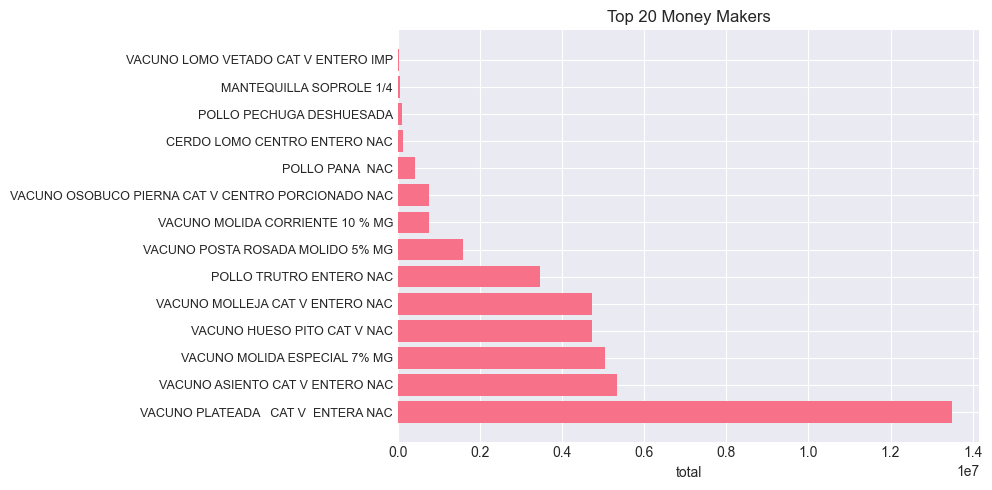

In [ ]:
# Top 20 products bar chart
top_20 = product_analysis.head(20)
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.barh(range(len(top_20)), top_20[revenue_col])
ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels(top_20[description_col], fontsize=9)  # Show product descriptions instead of index
ax1.set_title('Top 20 Money Makers')
ax1.set_xlabel(revenue_col)
plt.tight_layout()
plt.show()

### 2.3.3. Curva Acumulativa de la Realidad 80/20

La curva acumulativa ilustra la distribuci√≥n de ingresos entre productos, enfatizando la regla 80/20. Esta visualizaci√≥n ayuda a comprender la concentraci√≥n de ingresos.

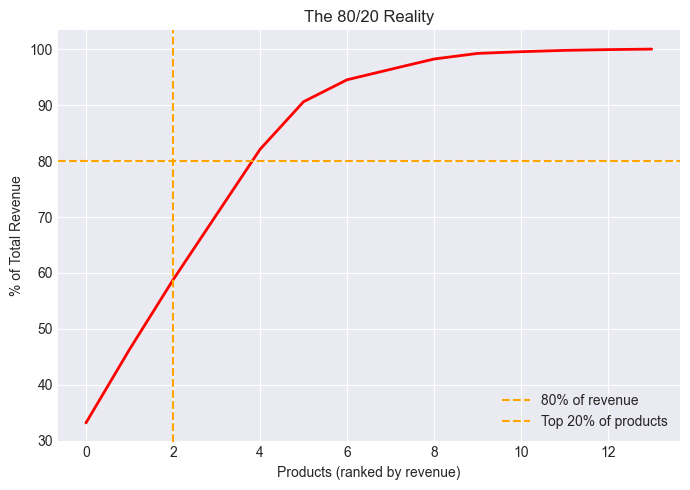

In [ ]:
# Cumulative curve
fig, ax2 = plt.subplots(figsize=(7, 5))
ax2.plot(range(len(product_analysis)), product_analysis['revenue_pct_cum'], color='red', linewidth=2)  # Curve in red
ax2.axhline(y=80, color='orange', linestyle='--', label='80% of revenue')  # Dotted line in orange
ax2.axvline(x=twenty_percent, color='orange', linestyle='--', label=f'Top 20% of products')  # Dotted line in orange
ax2.set_title('The 80/20 Reality')
ax2.set_xlabel('Products (ranked by revenue)')
ax2.set_ylabel('% of Total Revenue')
ax2.legend()
plt.tight_layout()
plt.show()

## 2.4. Alerta de Inventario Muerto

Esta secci√≥n identifica productos que no se est√°n vendiendo bien, destacando posibles problemas de inventario. Abordar estos art√≠culos puede liberar efectivo y espacio de almacenamiento.

### 2.4.1. ¬øQu√© se est√° acumulando polvo?

Analizar la fecha de la √∫ltima venta de cada producto ayuda a identificar art√≠culos que no se est√°n moviendo. Estos productos pueden requerir esfuerzos promocionales o liquidaci√≥n.

In [ ]:
# What's gathering dust?
last_sale = df.groupby(product_col).agg({
    date_col: 'max',
    description_col: 'first'
}).reset_index()

last_sale['days_since_sale'] = (present_dt - last_sale[date_col]).dt.days

# Add inventory value if you have it
if cost_col in df.columns and current_stock_col in df.columns:
    inventory_value = df.groupby(product_col).agg({
        cost_col: 'mean',
        current_stock_col: 'last'
    })
    last_sale = last_sale.merge(inventory_value, on=product_col)
    last_sale['tied_up_cash'] = last_sale[cost_col] * last_sale[current_stock_col]

# Categorize
last_sale['status'] = pd.cut(last_sale['days_since_sale'], 
                             bins=[0, 7, 30, 60, 90, 365, 9999],
                             labels=['Hot', 'Active', 'Slowing', 'Cold', 'Dead', 'Zombie'])

target_cols = ['glosa','days_since_sale','status']
debug_dataframe(last_sale[target_cols]) # last_sale


+----+---------------------------------+-------------------+----------+
|    | glosa                           |   days_since_sale | status   |
|----+---------------------------------+-------------------+----------|
|  0 | VACUNO ASIENTO CAT V ENTERO NAC |                19 | Active   |
|  1 | CERDO LOMO CENTRO ENTERO NAC    |                19 | Active   |
|  2 | POLLO PANA  NAC                 |                19 | Active   |
|  3 | POLLO PECHUGA DESHUESADA        |                19 | Active   |
|  4 | POLLO TRUTRO ENTERO NAC         |                19 | Active   |
+----+---------------------------------+-------------------+----------+


### 2.4.2. Verificaci√≥n de Salud del Inventario

Una representaci√≥n visual de la salud del inventario categoriza los productos seg√∫n su actividad de ventas. Esto ayuda a priorizar acciones para diferentes grupos de productos.

üíÄ DEAD STOCK: 0 products haven't sold in 30+ days!


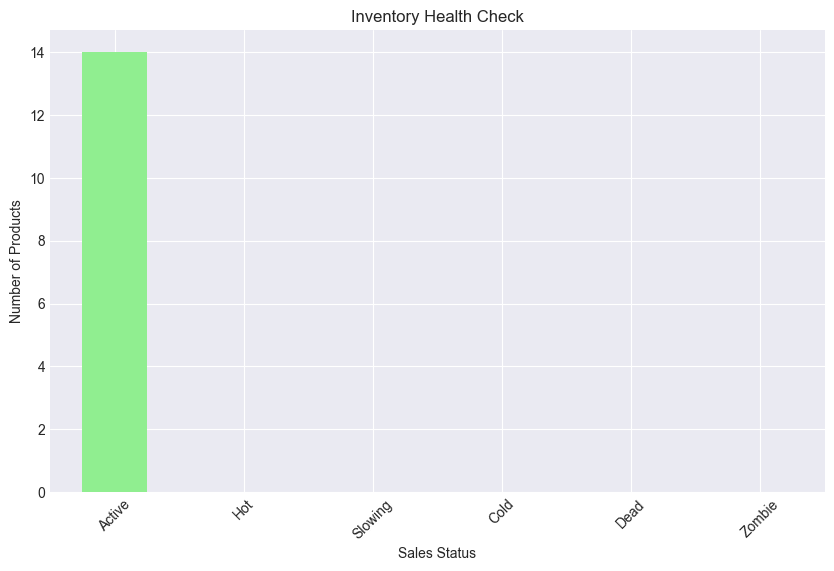

In [ ]:
dead_stock = last_sale[last_sale['days_since_sale'] > 30].sort_values('days_since_sale', ascending=False)

if 'tied_up_cash' in dead_stock.columns:
    total_dead_money = dead_stock['tied_up_cash'].sum()
    print(f"üíÄ DEAD MONEY ALERT: ${total_dead_money:,.0f} tied up in {len(dead_stock)} products that haven't sold in 30+ days!")
else:
    print(f"üíÄ DEAD STOCK: {len(dead_stock)} products haven't sold in 30+ days!")

# Visual
fig, ax = plt.subplots(figsize=(10, 6))
status_counts = last_sale['status'].value_counts()
colors = {'Hot': 'green', 'Active': 'lightgreen', 'Slowing': 'yellow', 
          'Cold': 'orange', 'Dead': 'red', 'Zombie': 'darkred'}
status_counts.plot(kind='bar', color=[colors[x] for x in status_counts.index], ax=ax)
ax.set_title('Inventory Health Check')
ax.set_ylabel('Number of Products')
ax.set_xlabel('Sales Status')
plt.xticks(rotation=45)
plt.show()

## 2.5. Mapa de Calor D√≠a/Hora

Comprender el momento de las ventas ayuda a optimizar el personal y las horas operativas. Esta secci√≥n explora patrones de ingresos por d√≠a y hora.

### 2.5.1. Agregar Columnas de Fecha y Hora

Extraer informaci√≥n de fecha y hora del conjunto de datos permite un an√°lisis temporal detallado. Este paso prepara los datos para crear un mapa de calor.

In [ ]:
# Parse 'fecha' to get just the date part
df['date_only'] = pd.to_datetime(df['fecha'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.date

# Build timestamp string: 'YYYY-MM-DD HH:MM:00'
df['timestamp_str'] = df['date_only'].astype(str) + ' ' + df['inith'].astype(str).str.zfill(2) + ':' + df['initm'].astype(str).str.zfill(2) + ':00'

# Parse to datetime
df['timestamp'] = pd.to_datetime(df['timestamp_str'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# When does money actually come in?
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['weekday'] = pd.to_datetime(df['timestamp']).dt.day_name()
df['weekday_num'] = pd.to_datetime(df['timestamp']).dt.dayofweek


interest_cols = ['fecha','inith','initm','timestamp','hour','weekday','weekday_num','timestamp_str'] 
debug_dataframe(df[interest_cols]) # df[interest_cols]

+----+---------------------+---------+---------+---------------------+--------+-----------+---------------+---------------------+
|    | fecha               |   inith |   initm | timestamp           |   hour | weekday   |   weekday_num | timestamp_str       |
|----+---------------------+---------+---------+---------------------+--------+-----------+---------------+---------------------|
|  0 | 2018-01-02 00:00:00 |       7 |      53 | 2018-01-02 07:53:00 |      7 | Tuesday   |             1 | 2018-01-02 07:53:00 |
|  1 | 2018-01-02 00:00:00 |       7 |      53 | 2018-01-02 07:53:00 |      7 | Tuesday   |             1 | 2018-01-02 07:53:00 |
|  2 | 2018-01-02 00:00:00 |       7 |      53 | 2018-01-02 07:53:00 |      7 | Tuesday   |             1 | 2018-01-02 07:53:00 |
|  3 | 2018-01-02 00:00:00 |       7 |      53 | 2018-01-02 07:53:00 |      7 | Tuesday   |             1 | 2018-01-02 07:53:00 |
|  4 | 2018-01-02 00:00:00 |      10 |       8 | 2018-01-02 10:08:00 |     10 | Tuesday   

### 2.5.2. Visualizaci√≥n del Mapa de Calor

El mapa de calor resalta patrones de ingresos en diferentes d√≠as y horas. Esta visualizaci√≥n ayuda a identificar momentos pico y fuera de pico para las ventas.

In [ ]:
# Create heatmap data
heatmap_revenue = df.pivot_table(values=revenue_col, index='hour', columns='weekday', aggfunc='sum')
debug_dataframe(heatmap_revenue) # heatmap_revenue

+--------+-------------+
|   hour |     Tuesday |
|--------+-------------|
|      7 | 2.05893e+07 |
|     10 | 2.00194e+07 |
+--------+-------------+


‚è∞ TIMING INSIGHT: Peak sales on Tuesdays around 7:00
   Slowest on Mondays around 10:00


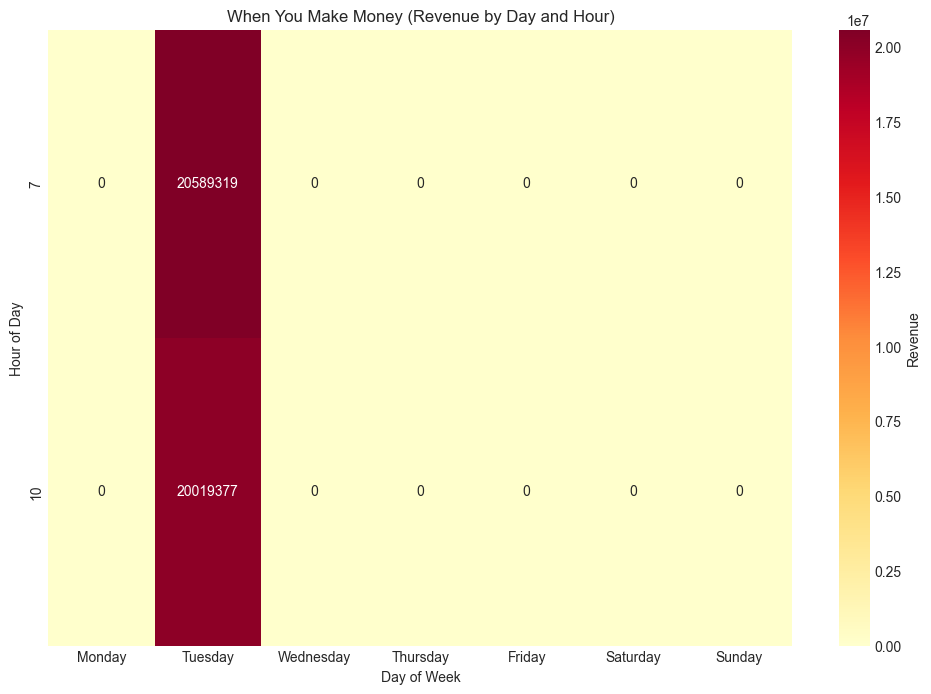

In [ ]:
# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_revenue = heatmap_revenue.reindex(columns=day_order, fill_value=0)

# Find peak and valley times
peak_day = heatmap_revenue.sum().idxmax()
peak_hour = heatmap_revenue.sum(axis=1).idxmax()
valley_day = heatmap_revenue.sum().idxmin()
valley_hour = heatmap_revenue.sum(axis=1).idxmin()

print(f"‚è∞ TIMING INSIGHT: Peak sales on {peak_day}s around {peak_hour}:00")
print(f"   Slowest on {valley_day}s around {valley_hour}:00")

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_revenue, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Revenue'})
plt.title('When You Make Money (Revenue by Day and Hour)')
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week')
plt.show()

## 2.6. Ganancia R√°pida

El tablero de resumen ejecutivo consolida ideas clave y recomendaciones accionables. Esta secci√≥n proporciona una visi√≥n general de alto nivel para los tomadores de decisiones.

In [ ]:
# Executive Summary Dashboard
print("=" * 50)
print("DISTRIBUIDORA INSIGHTS SUMMARY")
print("=" * 50)
print(f"\n1. üéØ FOCUS: Your top {twenty_percent} products generate {revenue_from_top_prcnt:.0f}% of revenue")
print(f"   ‚Üí Action: Focus inventory and marketing on these winners\n")

if 'total_dead_money' in locals():
    print(f"2. üí∞ CASH TRAP: ${total_dead_money:,.0f} stuck in dead inventory")
    print(f"   ‚Üí Action: Liquidate these {len(dead_stock)} products ASAP\n")

print(f"3. ‚è∞ OPTIMAL HOURS: Peak business on {peak_day}s @ {peak_hour}:00")
print(f"   ‚Üí Action: Staff accordingly, consider closing early on {valley_day}s\n")
print("=" * 50)

DISTRIBUIDORA INSIGHTS SUMMARY

1. üéØ FOCUS: Your top 2 products generate 46% of revenue
   ‚Üí Action: Focus inventory and marketing on these winners

3. ‚è∞ OPTIMAL HOURS: Peak business on Tuesdays @ 7:00
   ‚Üí Action: Staff accordingly, consider closing early on Mondays

